# PYTHON EDA Team.10

## 거시경제 변수가 부동산 가격에 미치는 영향
### 독립변수
- ### 아파트 매매지수

### 종속변수
- ### 물가
- ### 금리

### 0. 사전설정 (라이브러리, 글자, 데이터)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



In [8]:
source_data = pd.read_csv('20240505_integrated_data.csv')
source_data.columns

Index(['날짜', '매매지수', '전세지수', '월세지수', '비아파트', '아파트 거래량', '아파트 인허가', '아파트 준공',
       '아파트 착공', '지가변동률', 'KB주택매매가격지수', 'KB주택전세가격지수', '아파트매매실거래가격지수',
       '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수', '한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '현금통화량', '중앙은행 대 예금취급기관부채', '가계 통화량', '기업 통화량',
       '금융기관 통화량', '기타 통화량', '주택담보대출-예금취급기관', '주택담보대출-예금은행',
       '주택담보대출-비은행예금취급기관', '주택담보대출 - 주택금융공사 및 주택도시기금', '뉴스심리지수', '경제심리지수(원계열)',
       '경제심리지수(순환변동치)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)', '소비자물가지수(전세)',
       '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션'],
      dtype='object')

In [9]:
data = source_data[['날짜', '매매지수', '전세지수', '월세지수', 'KB주택매매가격지수', 'KB주택전세가격지수', '아파트매매실거래가격지수',
       '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수', '한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)', '소비자물가지수(전세)',
       '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션']]

In [10]:
data.to_csv('0507_EDA.csv', index=False)

'아파트매매실거래가격지수'(혼자 튀어서) 를 제외하고, 나머지데이터에 대해서
- 아파트 가격(독립변수)
- 그외 변수 (종속변수)
를 설정

In [11]:
price_columns = ['매매지수', '전세지수', '월세지수', 'KB주택매매가격지수', 'KB주택전세가격지수',
       '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수']

In [12]:
selected_columns = ['한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)', '소비자물가지수(전세)',
       '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   날짜              74 non-null     object 
 1   매매지수            74 non-null     float64
 2   전세지수            74 non-null     float64
 3   월세지수            74 non-null     float64
 4   KB주택매매가격지수      74 non-null     float64
 5   KB주택전세가격지수      74 non-null     float64
 6   아파트매매실거래가격지수    74 non-null     float64
 7   아파트매매가격지수       74 non-null     float64
 8   아파트전세가격지수       74 non-null     float64
 9   아파트월세통합가격지수     74 non-null     float64
 10  한국은행 기준금리       74 non-null     float64
 11  정부대출금리          74 non-null     float64
 12  국민주택채권1종(5년)    74 non-null     float64
 13  소비자물가지수(총지수)    74 non-null     float64
 14  소비자물가지수(주택임차료)  74 non-null     float64
 15  소비자물가지수(전세)     74 non-null     float64
 16  소비자물가지수(월세)     74 non-null     float64
 17  생산자물가지수         74 non-null     float

In [14]:
data['날짜'] = pd.to_datetime(data['날짜'])

C:\Users\User\AppData\Local\Temp\ipykernel_16176\3533634055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['날짜'] = pd.to_datetime(data['날짜'])


C:\Users\User\AppData\Local\Temp\ipykernel_16176\2539292785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['날짜'] = pd.to_datetime(data['날짜'])


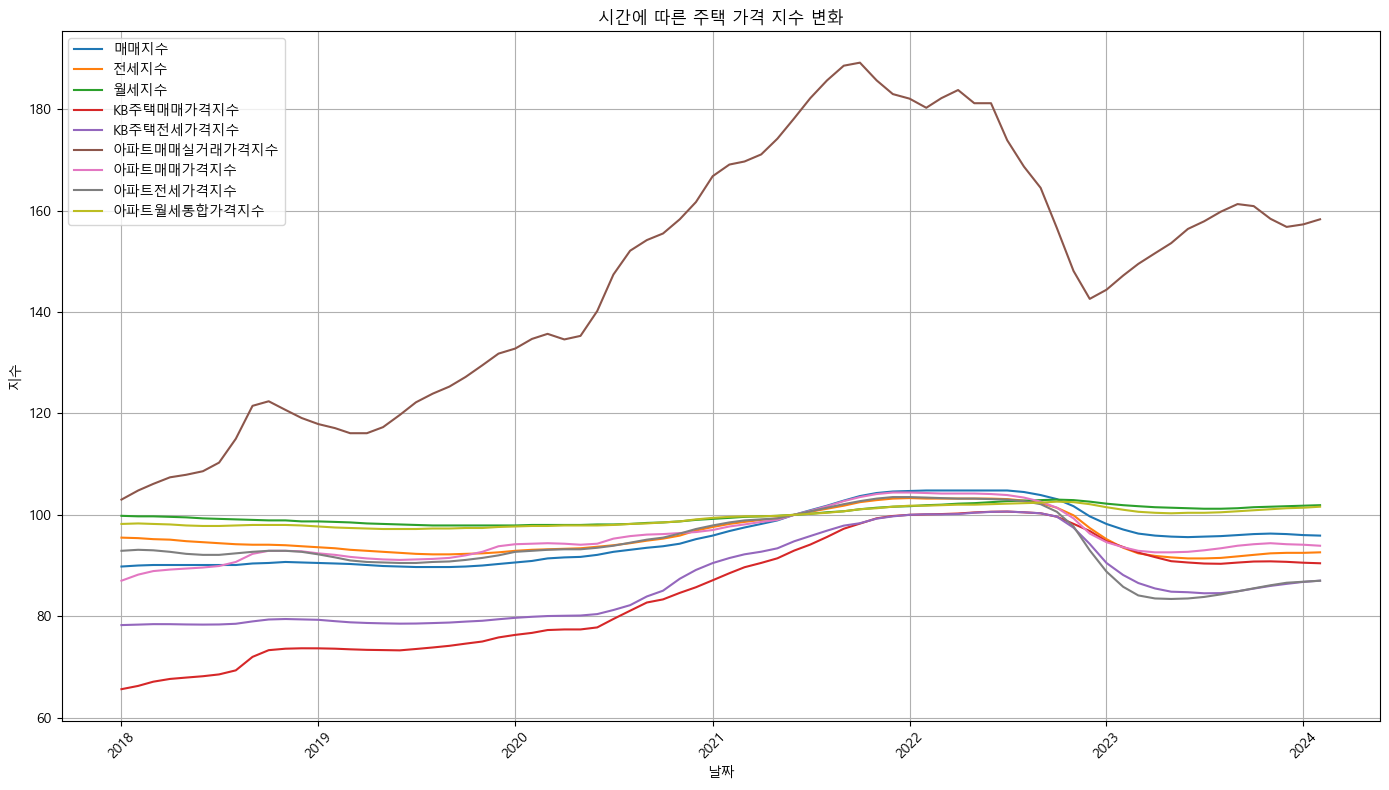

In [15]:
import matplotlib.pyplot as plt

# Convert '날짜' column to datetime
data['날짜'] = pd.to_datetime(data['날짜'])

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(data['날짜'], data['매매지수'], label='매매지수')
plt.plot(data['날짜'], data['전세지수'], label='전세지수')
plt.plot(data['날짜'], data['월세지수'], label='월세지수')
plt.plot(data['날짜'], data['KB주택매매가격지수'], label='KB주택매매가격지수')
plt.plot(data['날짜'], data['KB주택전세가격지수'], label='KB주택전세가격지수')
plt.plot(data['날짜'], data['아파트매매실거래가격지수'], label='아파트매매실거래가격지수')
plt.plot(data['날짜'], data['아파트매매가격지수'], label='아파트매매가격지수')
plt.plot(data['날짜'], data['아파트전세가격지수'], label='아파트전세가격지수')
plt.plot(data['날짜'], data['아파트월세통합가격지수'], label='아파트월세통합가격지수')

plt.title('시간에 따른 주택 가격 지수 변화')
plt.xlabel('날짜')
plt.ylabel('지수')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# 부동산 가격데이터

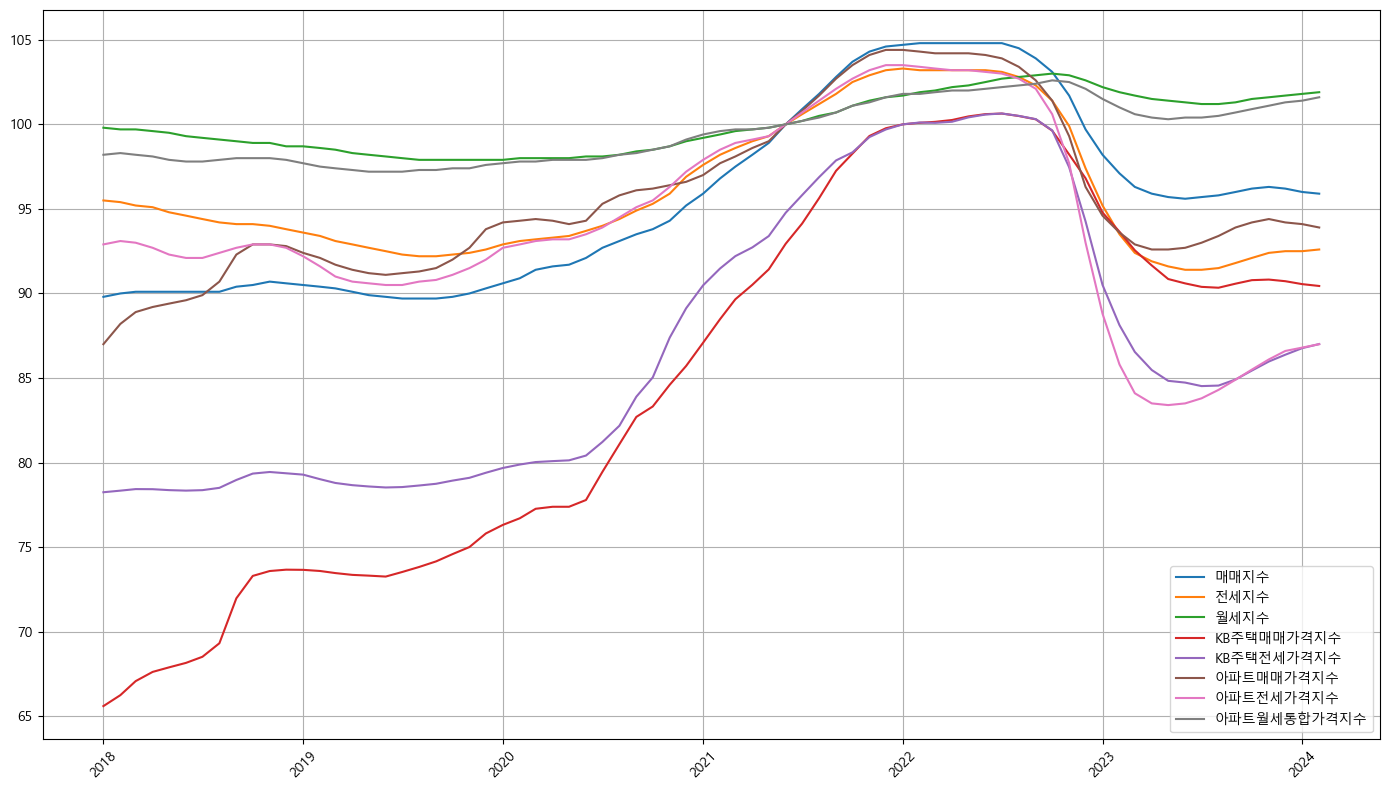

In [16]:
plt.figure(figsize=(14,8))

for x in price_columns:
    plt.plot(data['날짜'], data[x], label=x)

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [18]:
!pip install statsmodels

  Using cached statsmodels-0.14.2-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


C:\Users\User\AppData\Local\Temp\ipykernel_16176\1279683815.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['날짜'] = pd.to_datetime(data['날짜'])


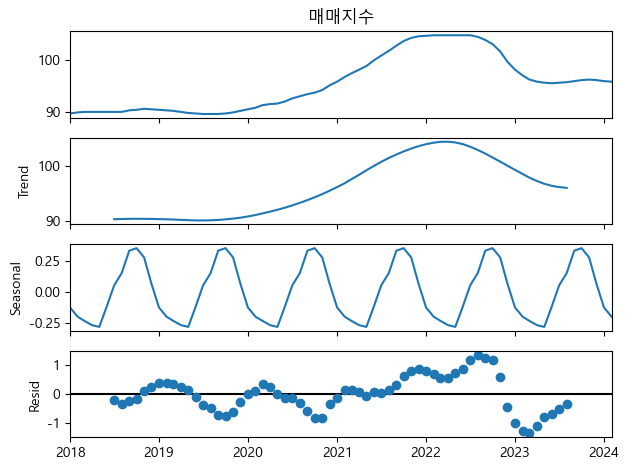

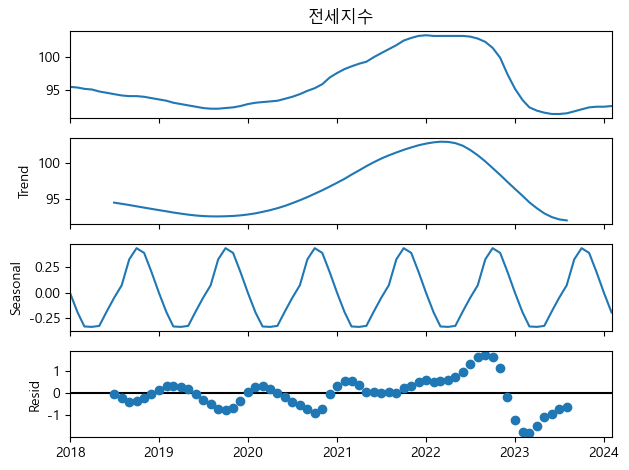

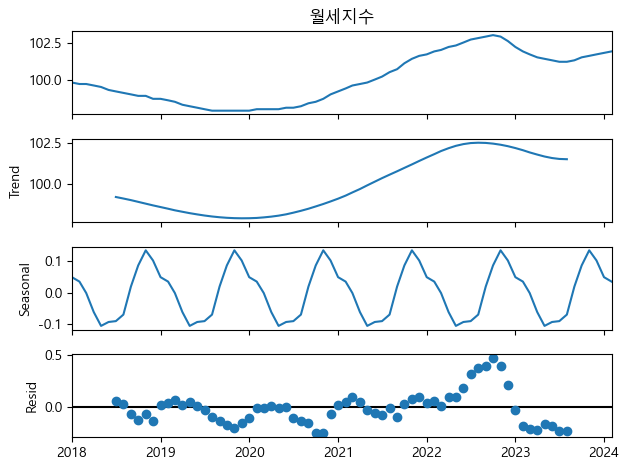

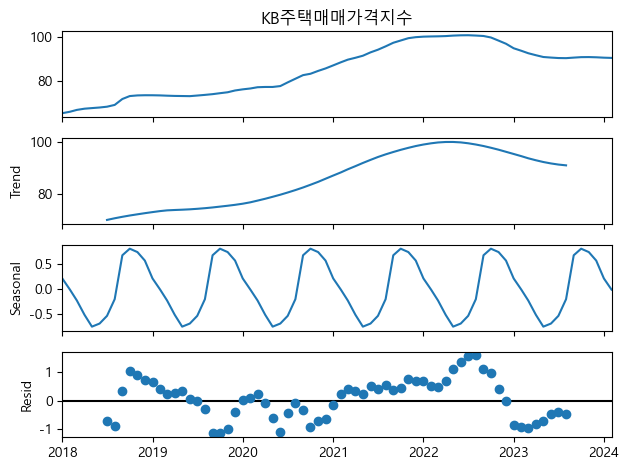

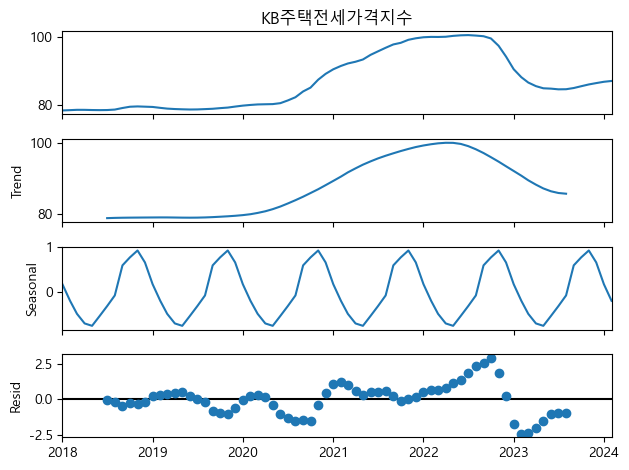

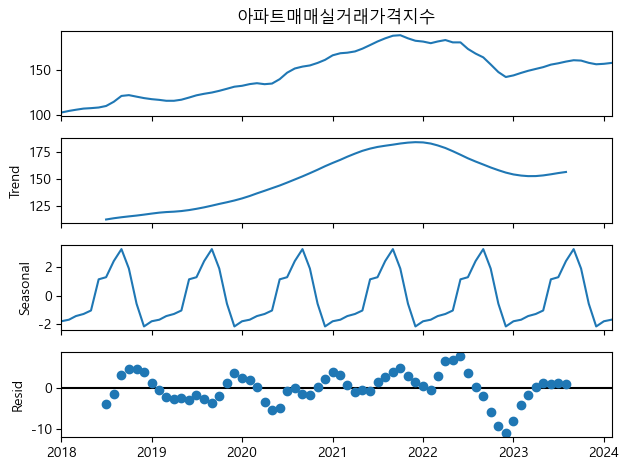

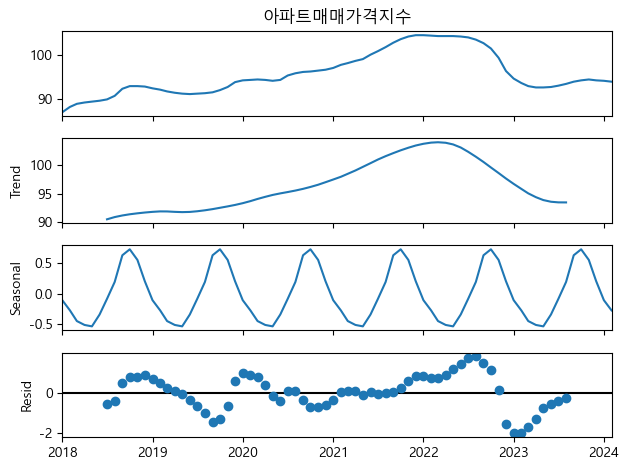

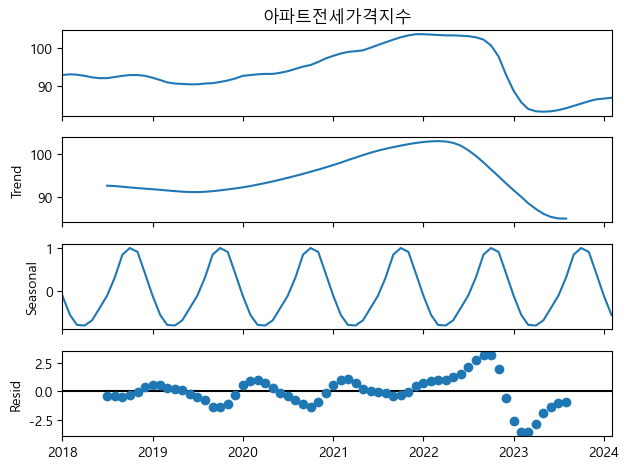

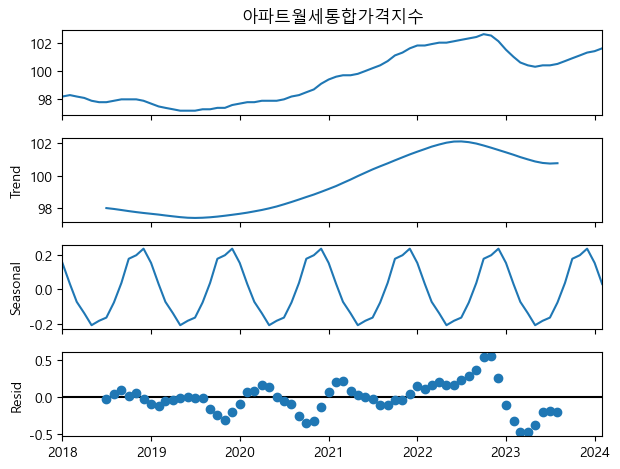

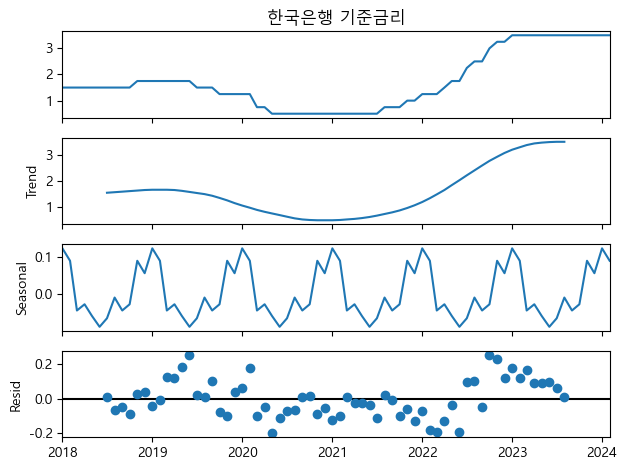

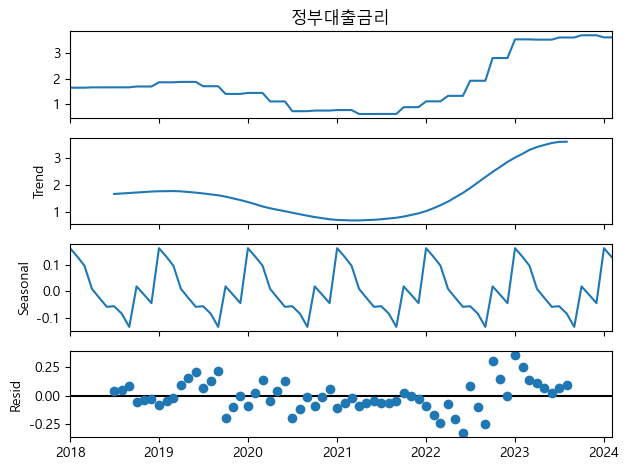

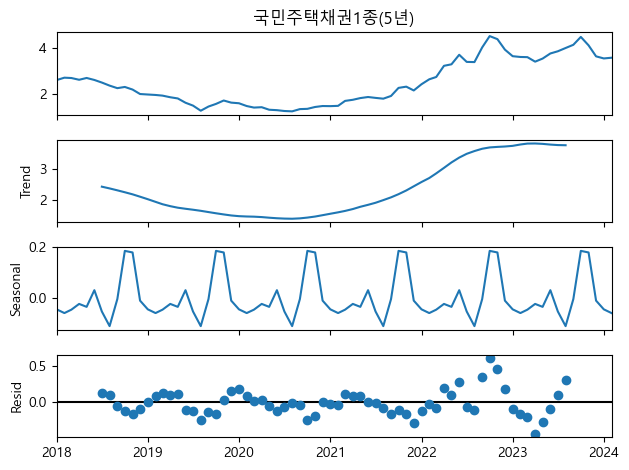

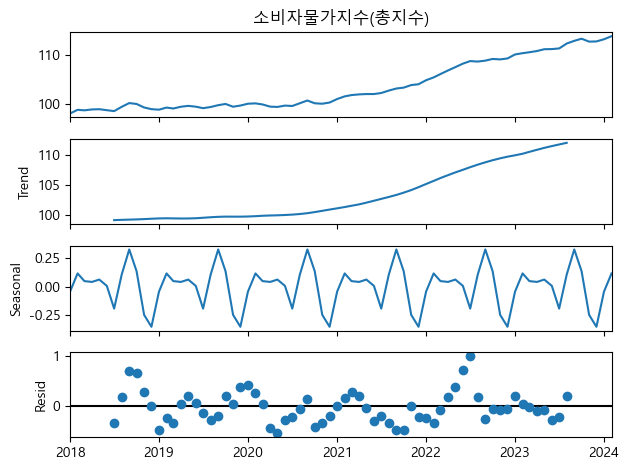

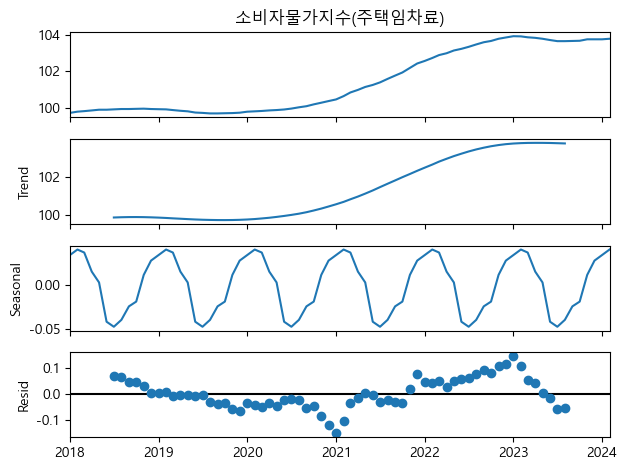

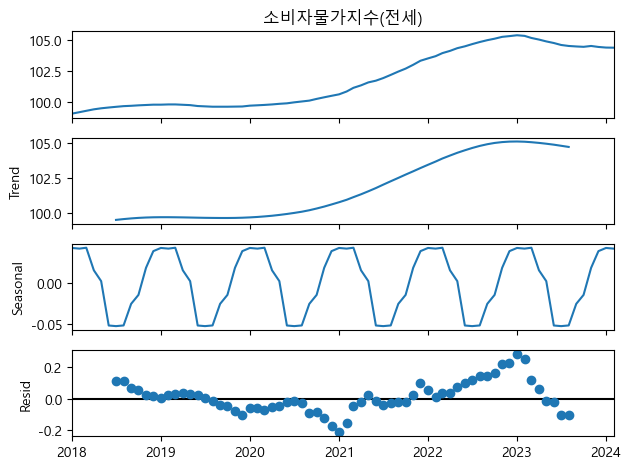

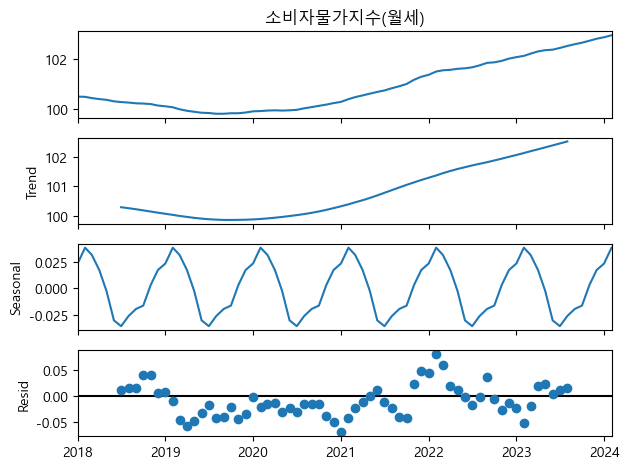

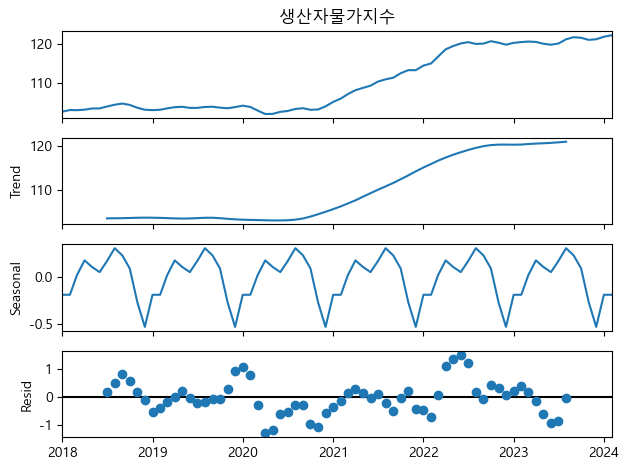

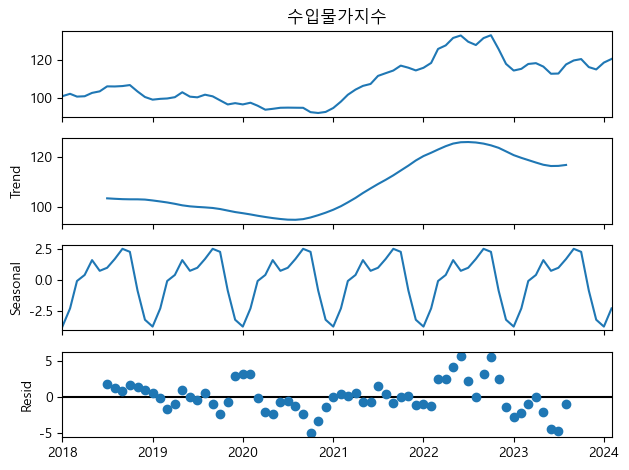

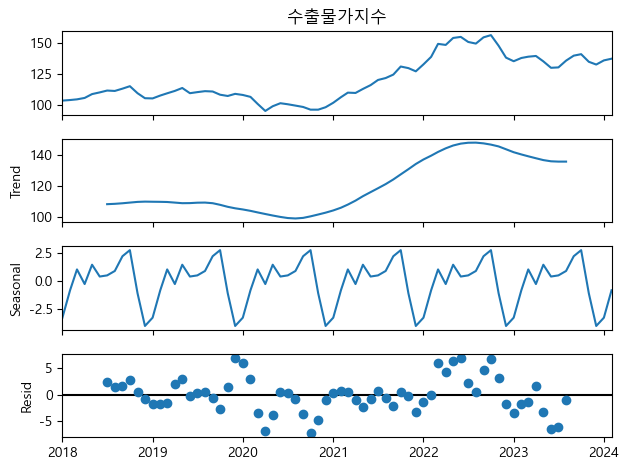

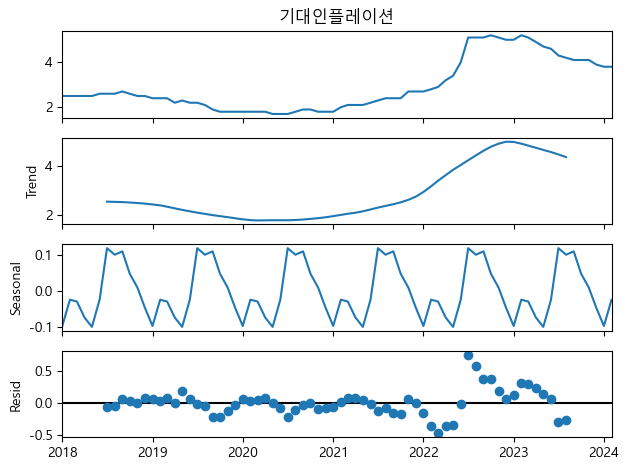

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Convert '날짜' column to datetime and set as index
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)

# Identify columns that are suitable for seasonal decomposition
time_series_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to hold the decomposition plots for each column
decomposition_results = {}

# Perform seasonal decomposition for each time series column
for column in time_series_columns:
    result = seasonal_decompose(data[column], model='additive', period=12)  # Assuming monthly data with yearly cycle
    decomposition_results[column] = result.plot()

# Display the decomposition results for '매매지수' as an example
plt.show()


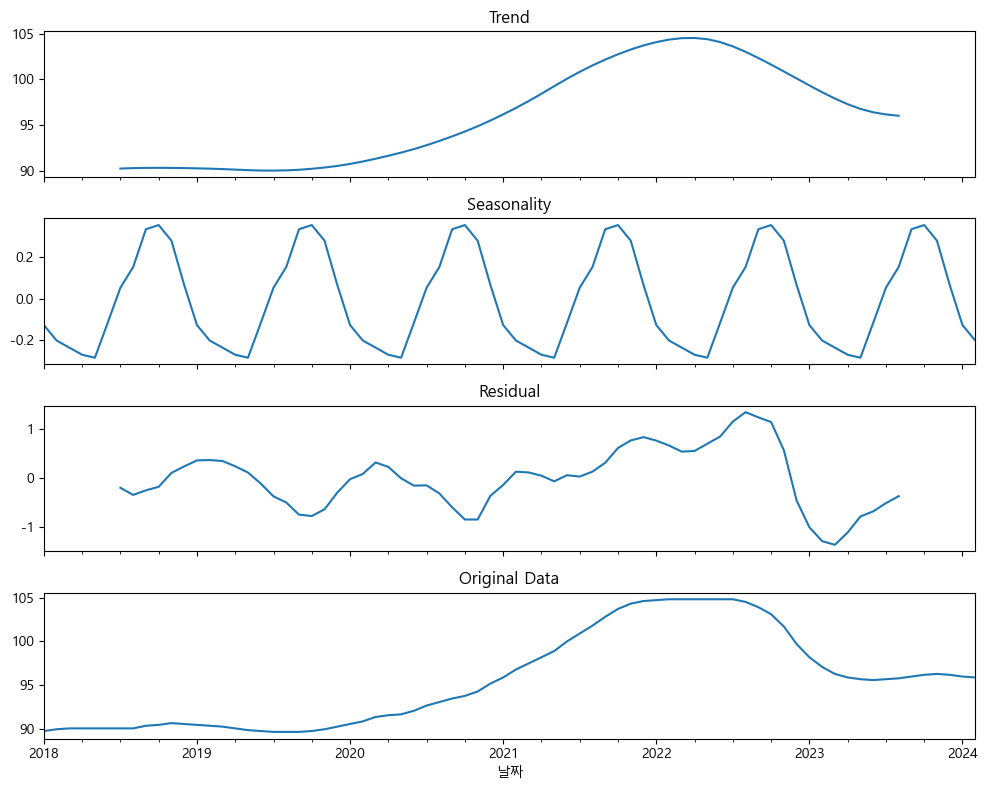

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Selecting only the price-related columns for decomposition
price_data = data[price_columns]

# Dictionary to store the decomposition results for each price-related column
price_decomposition_results = {}

# Perform seasonal decomposition for each price column
for column in price_columns:
    # Dropping any NA values for safe decomposition
    series = price_data[column].dropna()
    decomposition_result = seasonal_decompose(series, model='additive', period=12)
    price_decomposition_results[column] = decomposition_result

# Plotting the decomposition results for one of the columns as an example
example_column = '매매지수'
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10, 8))
price_decomposition_results[example_column].trend.plot(ax=axes[0], title='Trend')
price_decomposition_results[example_column].seasonal.plot(ax=axes[1], title='Seasonality')
price_decomposition_results[example_column].resid.plot(ax=axes[2], title='Residual')
price_data[example_column].plot(ax=axes[3], title='Original Data')
plt.tight_layout()
plt.show()


In [21]:

# Output the components for detailed analysis later
price_decomposition_results[example_column].trend, price_decomposition_results[example_column].seasonal, price_decomposition_results[example_column].resid


(날짜
 2018-01-01   NaN
 2018-02-01   NaN
 2018-03-01   NaN
 2018-04-01   NaN
 2018-05-01   NaN
               ..
 2023-10-01   NaN
 2023-11-01   NaN
 2023-12-01   NaN
 2024-01-01   NaN
 2024-02-01   NaN
 Name: trend, Length: 74, dtype: float64,
 날짜
 2018-01-01   -0.127002
 2018-02-01   -0.201169
 2018-03-01   -0.235336
 2018-04-01   -0.269502
 2018-05-01   -0.283669
                 ...   
 2023-10-01    0.352998
 2023-11-01    0.277998
 2023-12-01    0.065498
 2024-01-01   -0.127002
 2024-02-01   -0.201169
 Name: seasonal, Length: 74, dtype: float64,
 날짜
 2018-01-01   NaN
 2018-02-01   NaN
 2018-03-01   NaN
 2018-04-01   NaN
 2018-05-01   NaN
               ..
 2023-10-01   NaN
 2023-11-01   NaN
 2023-12-01   NaN
 2024-01-01   NaN
 2024-02-01   NaN
 Name: resid, Length: 74, dtype: float64)

In [22]:
# Let's analyze the trends, seasonality, and residuals from the decomposed components for '매매지수' in more detail
# First, let's extract each component for '매매지수'
trend = price_decomposition_results['매매지수'].trend
seasonal = price_decomposition_results['매매지수'].seasonal
resid = price_decomposition_results['매매지수'].resid
original = price_data['매매지수']

# Now, let's create a summary of insights based on these components
# We will look for trends in the trend data, typical seasonal patterns, and any notable residuals

# Check for overall trend direction over time
overall_trend = trend.dropna().diff().describe()

# Seasonal patterns
seasonal_pattern = seasonal.describe()

# Residual analysis
residual_analysis = resid.describe()

# Summarize the original data trends as well
original_data_trend = original.describe()

overall_trend, seasonal_pattern, residual_analysis, original_data_trend


(count    61.000000
 mean      0.094604
 std       0.466436
 min      -0.762500
 25%      -0.133333
 50%       0.066667
 75%       0.466667
 max       0.829167
 Name: trend, dtype: float64,
 count    74.000000
 mean     -0.004435
 std       0.227700
 min      -0.283669
 25%      -0.201169
 50%      -0.117002
 75%       0.151748
 max       0.352998
 Name: seasonal, dtype: float64,
 count    62.000000
 mean     -0.007998
 std       0.619580
 min      -1.360498
 25%      -0.372060
 50%       0.013530
 75%       0.357211
 max       1.344086
 Name: resid, dtype: float64,
 count     74.000000
 mean      95.572973
 std        5.362230
 min       89.700000
 25%       90.400000
 50%       95.650000
 75%       99.500000
 max      104.800000
 Name: 매매지수, dtype: float64)

### 분석 결과 및 인사이트

#### 1. 추세 (Trend)
'매매지수' 데이터의 추세를 분석해 보면, 전반적으로 월별 변화량의 평균(mean)이 0.09로 긍정적이며, 표준편차(std)는 0.47로 일부 변동성이 있음을 알 수 있습니다. 추세의 최소값(min)은 -0.76, 최대값(max)은 0.83으로, 일부 기간에는 가격이 크게 하락하거나 상승한 것을 볼 수 있습니다. 이는 2022년까지 상승 추세를 보였고, 2023년 이후에는 감소하는 추세를 보인 것으로 해석할 수 있습니다.

#### 2. 계절성 (Seasonality)
계절성 요소를 살펴보면, 평균적으로 매우 작은 변동(-0.004)을 보이며, 계절적 변동의 폭(std 0.23)도 비교적 작습니다. 이는 매매지수가 계절에 따라 큰 변동을 보이지 않고 비교적 안정적인 패턴을 유지하고 있음을 나타냅니다. 최소값과 최대값의 범위(-0.28에서 0.35)는 특정 계절에 약간의 매매 활동 증가나 감소가 있을 수 있음을 시사합니다.

#### 3. 잔차 (Residual)
잔차 분석에서는 평균적으로 거의 변동이 없으며(std 0.62), 일부 데이터 포인트에서 예상치 못한 큰 변동(-1.36에서 1.34)을 보입니다. 이는 모델이 설명하지 못하는 일부 이벤트나 변동이 존재함을 의미하며, 추가적인 변수의 고려나 모델 개선이 필요할 수 있습니다.

#### 4. 원본 데이터 (Original Data)
원본 '매매지수' 데이터의 평균은 95.57이며, 중앙값(median)은 95.65로 일관성 있는 분포를 보입니다. 최소값은 89.7, 최대값은 104.8로, 데이터는 89.7에서 104.8 사이에 분포하며, 시간이 지남에 따라 매매지수가 변동하는 패턴을 확인할 수 있습니다.

### 추가 분석 제안
- **이상치 및 외부 이벤트 분석**: 잔차에서 나타나는 큰 이상치를 분석하여, 특정 시점에서의 데이터 변동 원인을 조사할 필요가 있습니다.
- **계절성과 연계된 마케팅 전략**: 비록 큰 계절적 변동은 없지만, 계절성 데이터를 활용하여 시기별 마케팅 전략을 구상할 수 있습니다.
- **장기적 시장 동향 예측**: 추세 데이터를 기반으로 향후 몇 년간의 매매지수 동향을 예측하고, 이에 따른 투자 또는 정책 결정에 활용할 수 있습니다.

In [23]:
# Analyzing outliers in the residuals to find any external events or anomalies that could explain significant deviations
# First, we will define what constitutes an outlier in the residuals
# Common approach is to use mean ± 2*standard deviation for outlier detection

residual_mean = resid.mean()
residual_std = resid.std()

# Define outliers as points more than 2 standard deviations from the mean
outlier_threshold_upper = residual_mean + 2 * residual_std
outlier_threshold_lower = residual_mean - 2 * residual_std

# Identify the outliers
outliers = resid[(resid > outlier_threshold_upper) | (resid < outlier_threshold_lower)]

# Display the dates and values of these outliers
outlier_dates = outliers.index
outlier_values = outliers.values

outliers_df = pd.DataFrame({
    'Date': outlier_dates,
    'Residual': outlier_values
})

outliers_df


,Date,Residual
0,2022-08-01,1.344086
1,2022-09-01,1.237836
2,2023-02-01,-1.286331
3,2023-03-01,-1.360498


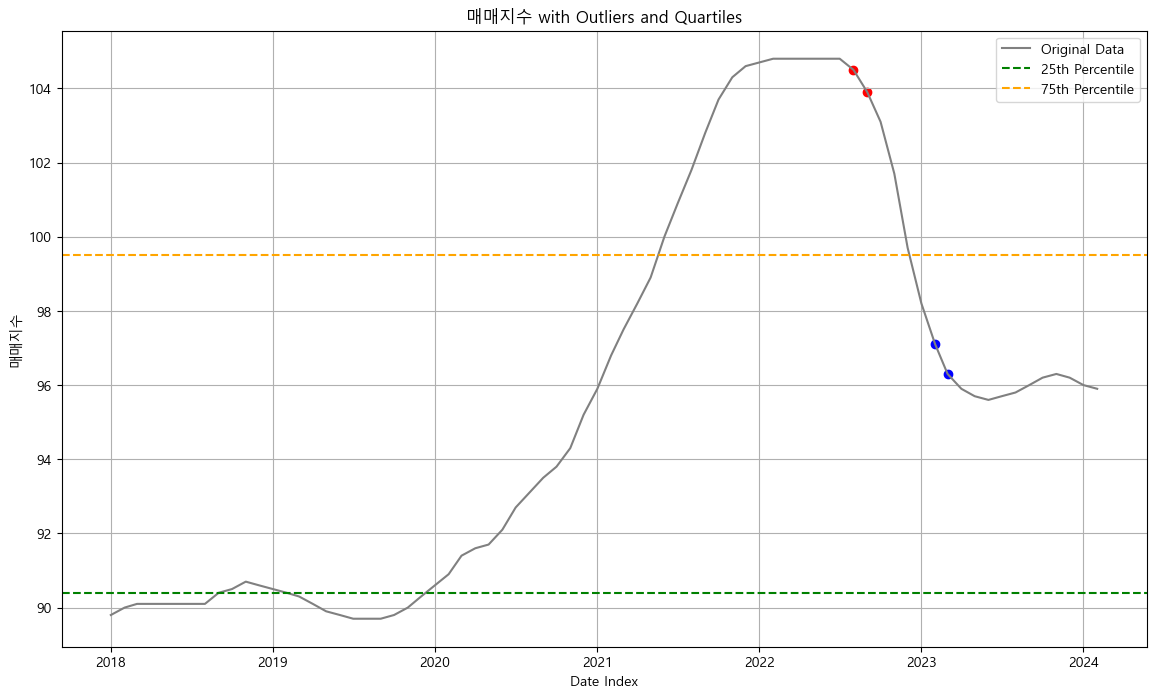

In [24]:
import matplotlib.pyplot as plt

# Visualizing the original data with the identified outliers highlighted and quartile information

# Plot the original data
plt.figure(figsize=(14, 8))
plt.plot(price_data.index, original, label='Original Data', color='grey')

# Highlight the outliers in the residuals
for date, value in outliers.items():
    if value > 0:
        plt.scatter(date, original[date], color='red', label='Positive Outlier' if date == 55 else "")  # Red for positive
    else:
        plt.scatter(date, original[date], color='blue', label='Negative Outlier' if date == 61 else "")  # Blue for negative

# Quartile calculations
q25 = original.quantile(0.25)
q75 = original.quantile(0.75)

# Highlight the quartiles
plt.axhline(q25, color='green', linestyle='--', label='25th Percentile')
plt.axhline(q75, color='orange', linestyle='--', label='75th Percentile')

plt.title('매매지수 with Outliers and Quartiles')
plt.xlabel('Date Index')
plt.ylabel('매매지수')
plt.legend()
plt.grid(True)
plt.show()


---


여기 '매매지수' 데이터를 분석하는 과정에서 사용한 전체 코드와 각 단계의 설명을 정리했습니다. 이 프로세스를 다른 열에 적용하여 유사한 분석을 수행할 수 있습니다:

1. 데이터 로딩 및 준비

In [25]:
!pip install statsmodels

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 로드
data = pd.read_csv('0507_EDA.csv')

# 날짜 형식 변환 및 인덱스 설정
data['날짜'] = pd.to_datetime(data['날짜'])
data.set_index('날짜', inplace=True)


2. 계절성 분해

In [27]:
# 계절성 분해를 원하는 열 선택
column = '매매지수'  # 다른 열 이름으로 변경 가능
series = data[column].dropna()  # NA 값 제거

# 계절성 분해 실행
decomposition_result = seasonal_decompose(series, model='additive', period=12)

# 분해 결과 추출
trend = decomposition_result.trend
seasonal = decomposition_result.seasonal
resid = decomposition_result.resid


3. 각 구성 요소 시각화

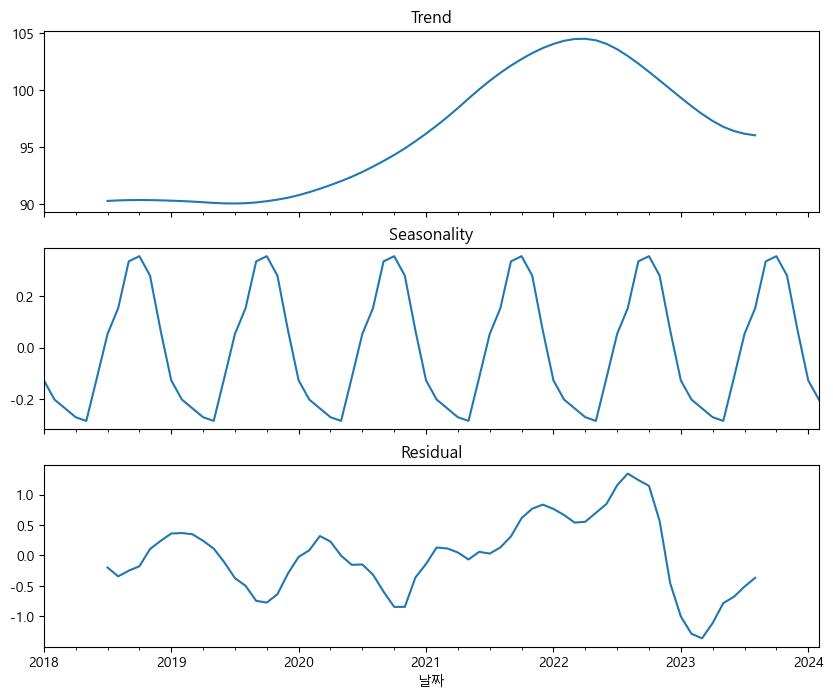

In [28]:
# 추세, 계절성, 잔차 시각화
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
trend.plot(ax=axes[0], title='Trend')
seasonal.plot(ax=axes[1], title='Seasonality')
resid.plot(ax=axes[2], title='Residual')
plt.show()


4. 데이터 통계 분석 및 인사이트

In [29]:
# 데이터의 통계적 요약
print(series.describe())

# 추세의 변화 분석
print(trend.diff().describe())

# 계절성 및 잔차의 통계적 요약
print(seasonal.describe())
print(resid.describe())


count     74.000000
mean      95.572973
std        5.362230
min       89.700000
25%       90.400000
50%       95.650000
75%       99.500000
max      104.800000
Name: 매매지수, dtype: float64
count    61.000000
mean      0.094604
std       0.466436
min      -0.762500
25%      -0.133333
50%       0.066667
75%       0.466667
max       0.829167
Name: trend, dtype: float64
count    74.000000
mean     -0.004435
std       0.227700
min      -0.283669
25%      -0.201169
50%      -0.117002
75%       0.151748
max       0.352998
Name: seasonal, dtype: float64
count    62.000000
mean     -0.007998
std       0.619580
min      -1.360498
25%      -0.372060
50%       0.013530
75%       0.357211
max       1.344086
Name: resid, dtype: float64


5. 이상치 분석

In [30]:
# 이상치 정의 및 탐지
residual_mean = resid.mean()
residual_std = resid.std()
outliers = resid[(resid > residual_mean + 2 * residual_std) | (resid < residual_mean - 2 * residual_std)]


6. 이상치 및 사분위수를 포함한 시각화

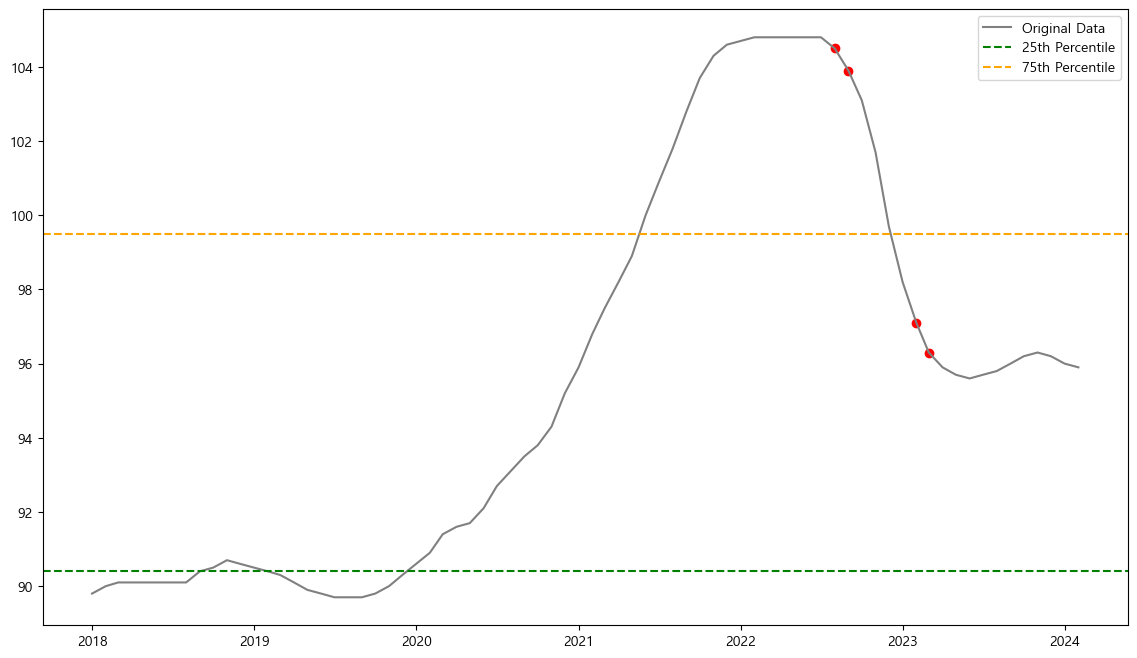

In [31]:
# 전체 데이터 및 이상치 시각화
plt.figure(figsize=(14, 8))
plt.plot(data.index, series, label='Original Data', color='grey')
for date in outliers.index:
    plt.scatter(date, series.loc[date], color='red' if series.loc[date] > 0 else 'blue')
plt.axhline(series.quantile(0.25), color='green', linestyle='--', label='25th Percentile')
plt.axhline(series.quantile(0.75), color='orange', linestyle='--', label='75th Percentile')
plt.legend()
plt.show()


상자 그림 및 히스토그램 그리기

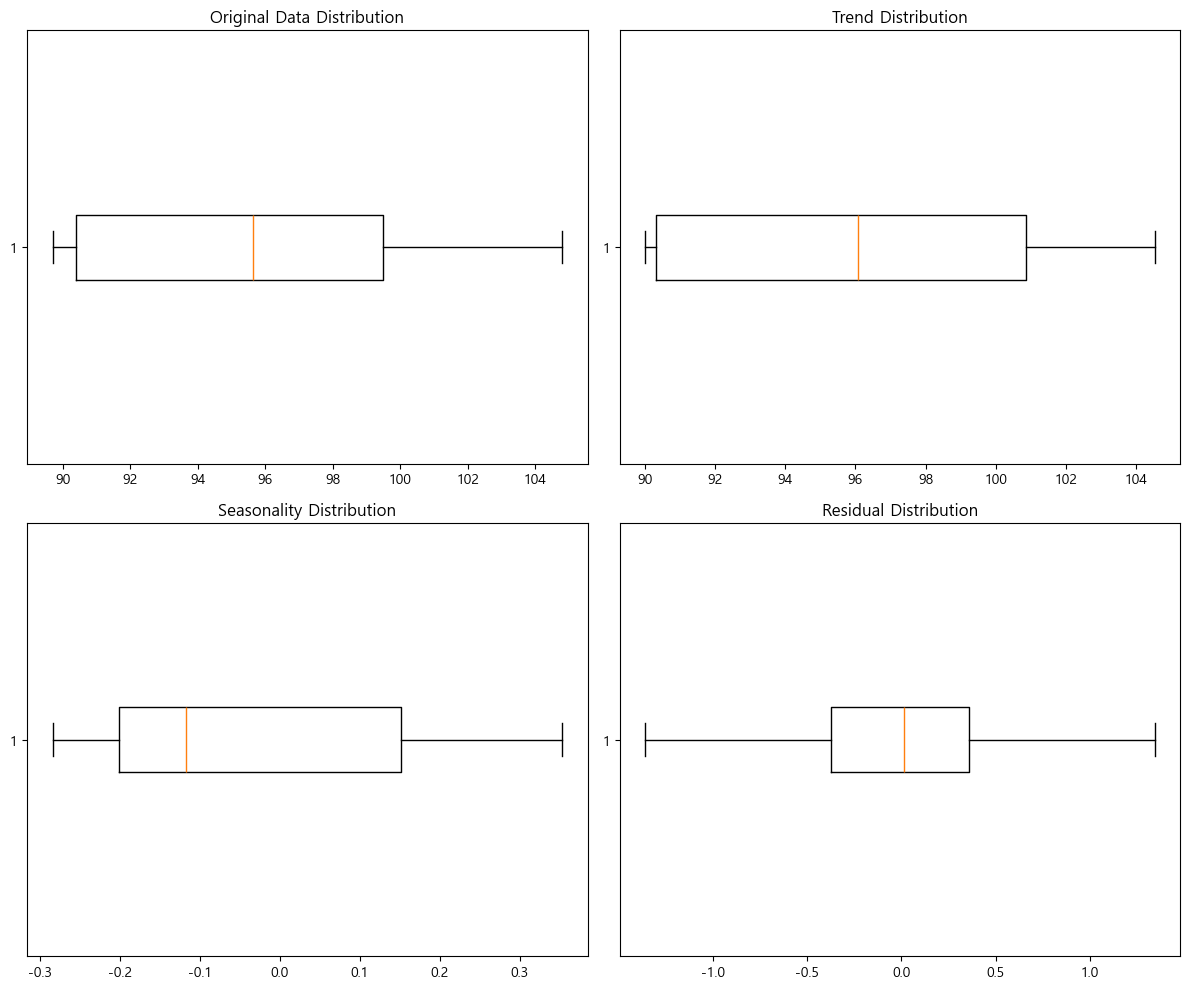

In [32]:
import matplotlib.pyplot as plt

# 각 구성 요소에 대한 상자 그림
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 원본 데이터
axes[0].boxplot(series.dropna(), vert=False)
axes[0].set_title('Original Data Distribution')

# 추세 데이터
axes[1].boxplot(trend.dropna(), vert=False)
axes[1].set_title('Trend Distribution')

# 계절성 데이터
axes[2].boxplot(seasonal.dropna(), vert=False)
axes[2].set_title('Seasonality Distribution')

# 잔차 데이터
axes[3].boxplot(resid.dropna(), vert=False)
axes[3].set_title('Residual Distribution')

plt.tight_layout()
plt.show()


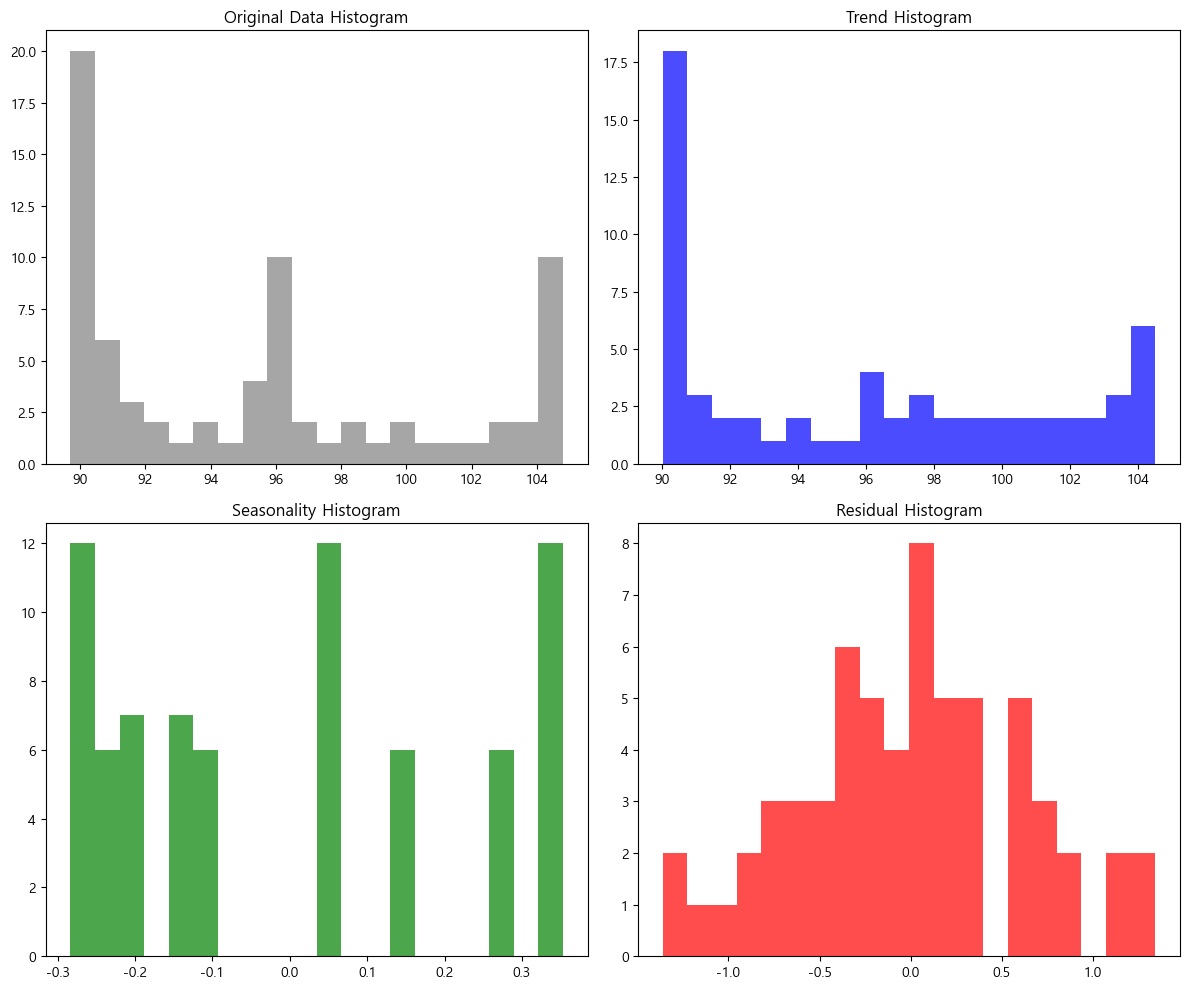

In [33]:

# 각 구성 요소에 대한 히스토그램
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# 원본 데이터
axes[0].hist(series.dropna(), bins=20, color='gray', alpha=0.7)
axes[0].set_title('Original Data Histogram')

# 추세 데이터
axes[1].hist(trend.dropna(), bins=20, color='blue', alpha=0.7)
axes[1].set_title('Trend Histogram')

# 계절성 데이터
axes[2].hist(seasonal.dropna(), bins=20, color='green', alpha=0.7)
axes[2].set_title('Seasonality Histogram')

# 잔차 데이터
axes[3].hist(resid.dropna(), bins=20, color='red', alpha=0.7)
axes[3].set_title('Residual Histogram')

plt.tight_layout()
plt.show()


---

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# Pandas Profiling Report 생성
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)

# 리포트를 HTML 파일로 저장하고 노트북에서 바로 보기
profile.to_file("pandas_profiling_report.html")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 49464 (\N{HANGUL SYL

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.savefig(
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 44201 (\N{HANGUL SYL

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

ModuleNotFoundError: No module named 'pandas.io.formats.html'

In [ ]:
import sweetviz as sv

# Sweetviz Report 생성
report = sv.analyze(data)

# 리포트를 HTML 파일로 저장하고 브라우저에서 바로 보기
report.show_html('sweetviz_report.html')


                                             |          | [  0%]   00:00 -> (? left)

c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\upstage\lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
c:\Users\User\Desktop\Upstage AI Lab\EDA_project\

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from dataprep.eda import create_report

# DataPrep Report 생성
report = create_report(data)

# 리포트를 HTML 파일로 저장하고 브라우저에서 바로 보기
report.save("dataprep_report.html")
report.show_browser()


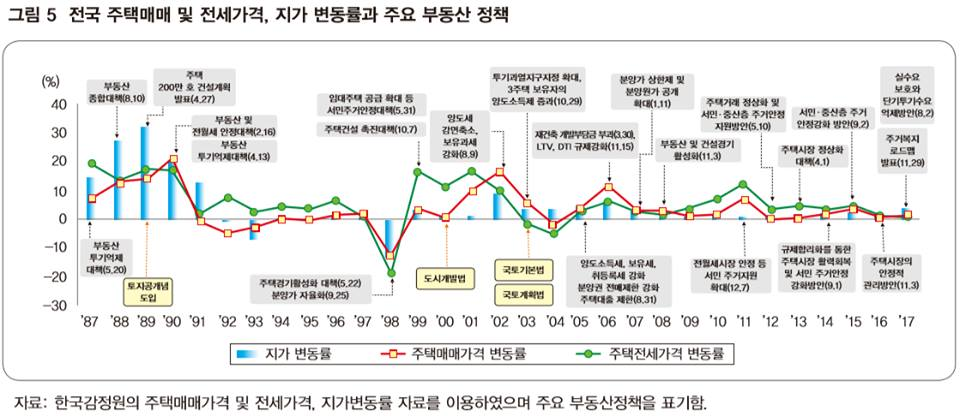

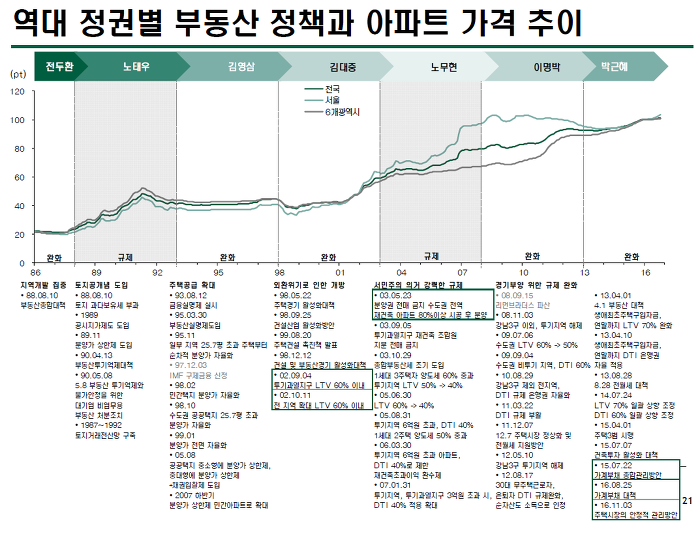